<a href="https://colab.research.google.com/github/Shaily0808/Projects/blob/main/Student_Identifiers_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/student-mat-negatively-correlated-again.csv'
data = pd.read_csv(file_path)

# Display the first few rows and dataset info
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    float64
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel   freetime      goout  Dalc  Walc health   absences  G1  G2  G3  
 0      4   2.541399  22.291345     1     1      3  26.018269   5   6   6  
 1      5   7.571065  21.215663     1     1      3  24.199607   5   5   6  
 2      4   7.680922  15.438044     2     3      3  17.873831   7   8  10  
 3      3  13.621330   7.923995     1     1      5   7.158495  15  14  15  
 4      4   6.670907  15.639512     1     2      5  18.204129   6  10  10  
 
 [5 rows x 33 columns],
 None)

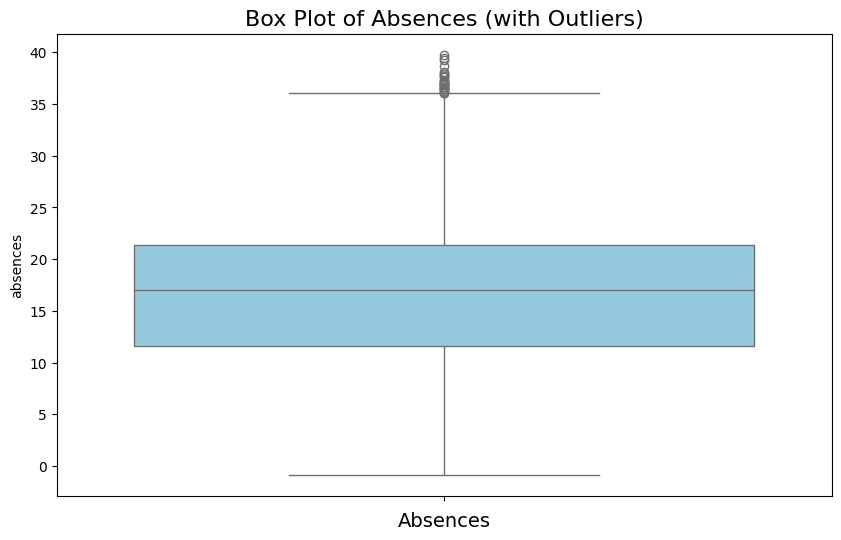

Number of outliers detected: 27


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the 'absences' column with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data['absences'], color='skyblue')
plt.title('Box Plot of Absences (with Outliers)', fontsize=16)
plt.xlabel('Absences', fontsize=14)
plt.show()

# Identify outliers using the IQR method
Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (data['absences'] < (Q1 - 1.5 * IQR)) | (data['absences'] > (Q3 + 1.5 * IQR))
outliers_detected = data[outlier_condition]

print(f"Number of outliers detected: {outliers_detected.shape[0]}")


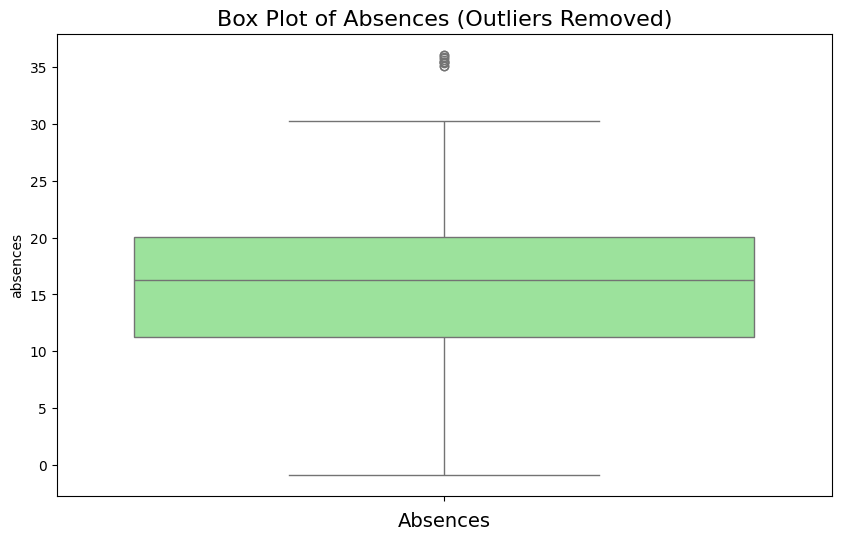

Number of rows after removing outliers: 368


In [ ]:
# Remove outliers
data_cleaned = data[~outlier_condition]

# Visualize the cleaned 'absences' column with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data_cleaned['absences'], color='lightgreen')
plt.title('Box Plot of Absences (Outliers Removed)', fontsize=16)
plt.xlabel('Absences', fontsize=14)
plt.show()

print(f"Number of rows after removing outliers: {data_cleaned.shape[0]}")
df = data_cleaned


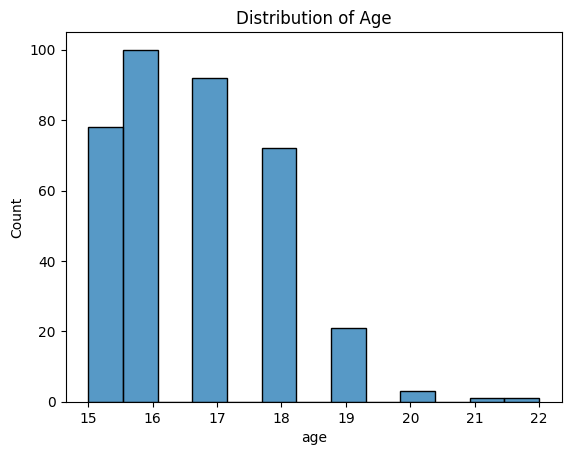

In [ ]:
sns.histplot(df['age'])
plt.title("Distribution of Age")
plt.show()


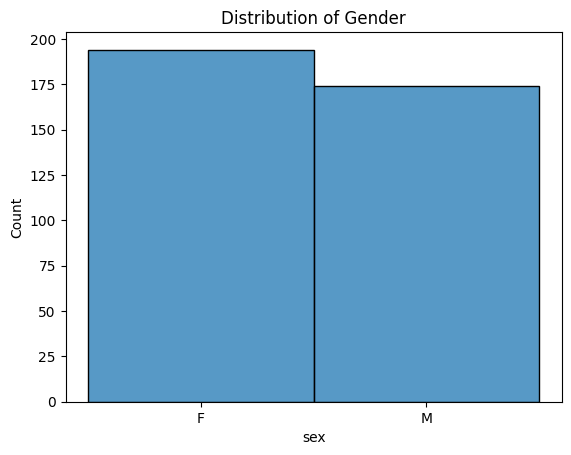

Value counts for 'sex':
sex
F    194
M    174
Name: count, dtype: int64


<ipython-input-123-b09a5956e7dc>:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['sex']))


In [ ]:
sns.histplot(df['sex'])
plt.title("Distribution of Gender")
plt.show()

# Value counts for 'sex'
print("Value counts for 'sex':")
print(pd.value_counts(df['sex']))


<Figure size 1000x500 with 0 Axes>

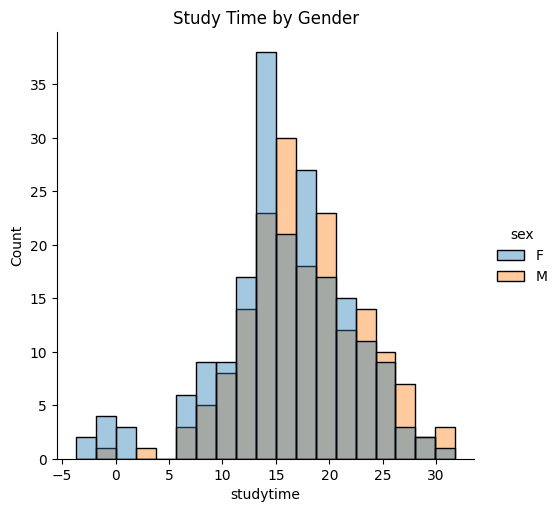

Mean study time for girls: 15.895732327713088
Mean study time for boys: 17.629880903894747


In [ ]:
plt.figure(figsize=(10, 5))
sns.displot(data=df, x='studytime', hue='sex', alpha=0.4)
plt.title("Study Time by Gender")
plt.show()

# Mean study time for girls and boys
girlsStudyTime = df[df['sex'] == 'F']['studytime']
boysStudyTime = df[df['sex'] == 'M']['studytime']

print(f"Mean study time for girls: {girlsStudyTime.mean()}")
print(f"Mean study time for boys: {boysStudyTime.mean()}")


In [ ]:
# Adding a new column for the average score of the three grades
df['avgscore'] = (df['G1'] + df['G2'] + df['G3']) / 3
df.head()


<ipython-input-125-c964c16d7721>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgscore'] = (df['G1'] + df['G2'] + df['G3']) / 3


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2.541399,22.291345,1,1,3,26.018269,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,7.571065,21.215663,1,1,3,24.199607,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,7.680922,15.438044,2,3,3,17.873831,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,13.621330,7.923995,1,1,5,7.158495,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,6.670907,15.639512,1,2,5,18.204129,6,10,10,8.666667


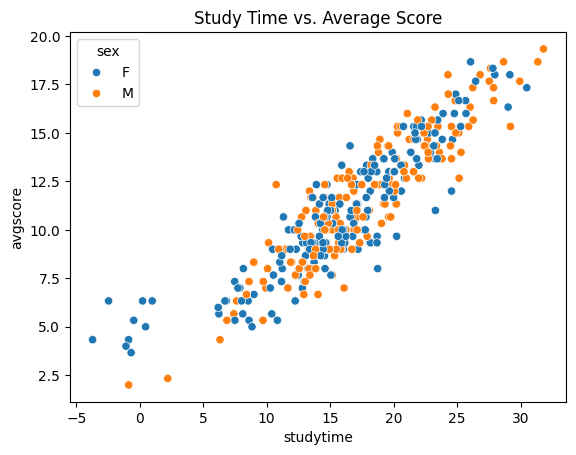

In [ ]:
sns.scatterplot(data=df, x='studytime', y='avgscore', hue='sex')
plt.title("Study Time vs. Average Score")
plt.show()


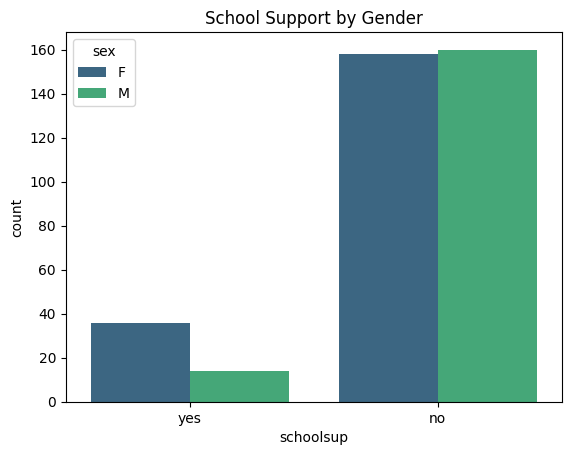

In [ ]:
sns.countplot(data=df, x='schoolsup', hue='sex', palette='viridis')
plt.title("School Support by Gender")
plt.show()


In [ ]:
string_columns = df.select_dtypes(include=['object'])

# Get the names of columns with data type "string"
string_column_names = string_columns.columns.tolist()
print(string_column_names)


['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


<Axes: >

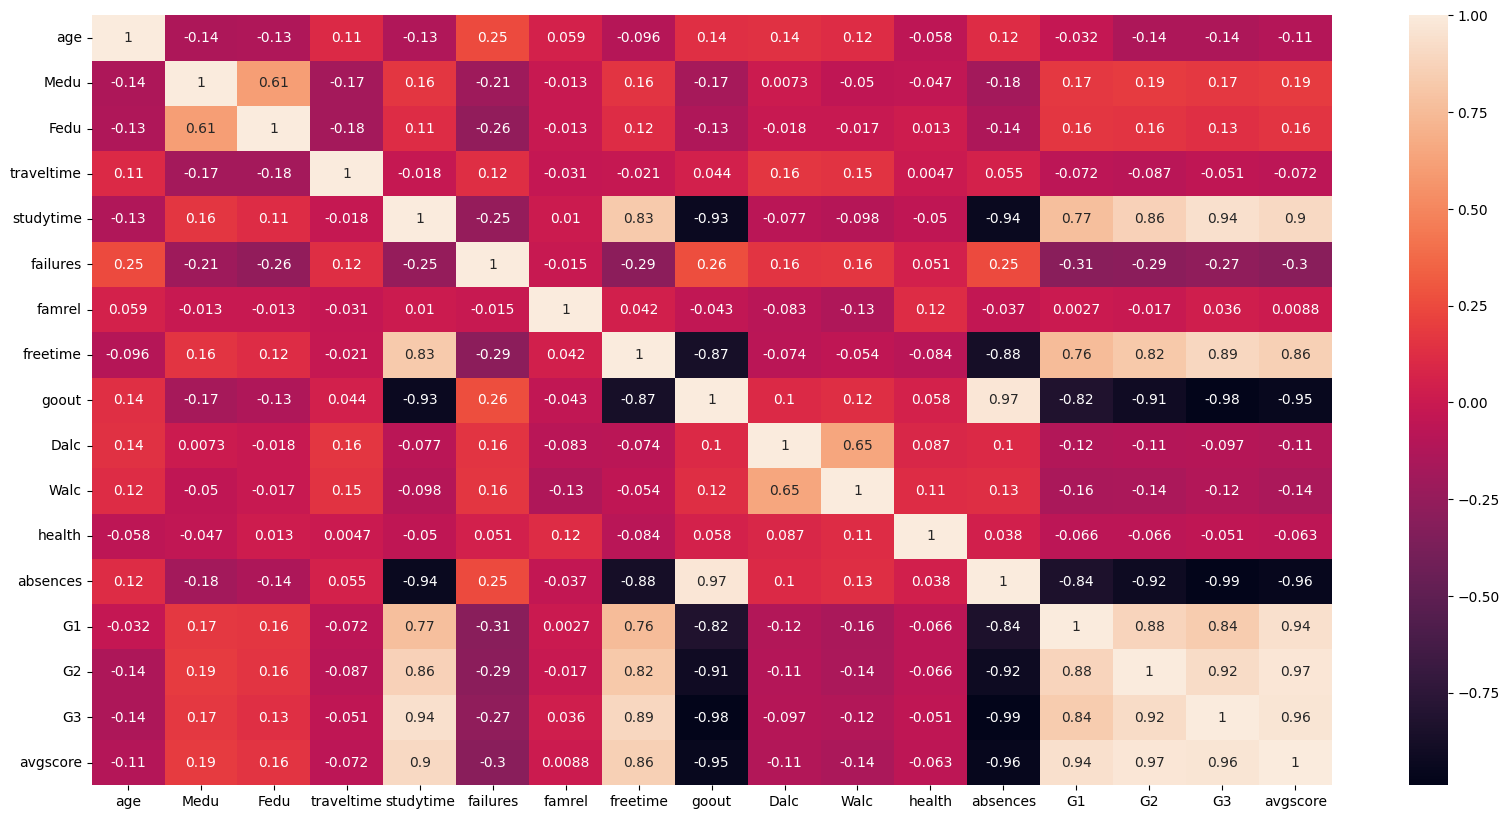

In [ ]:
# find corrleation and igrnore the non-numeric columns
corrMatrix = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True)

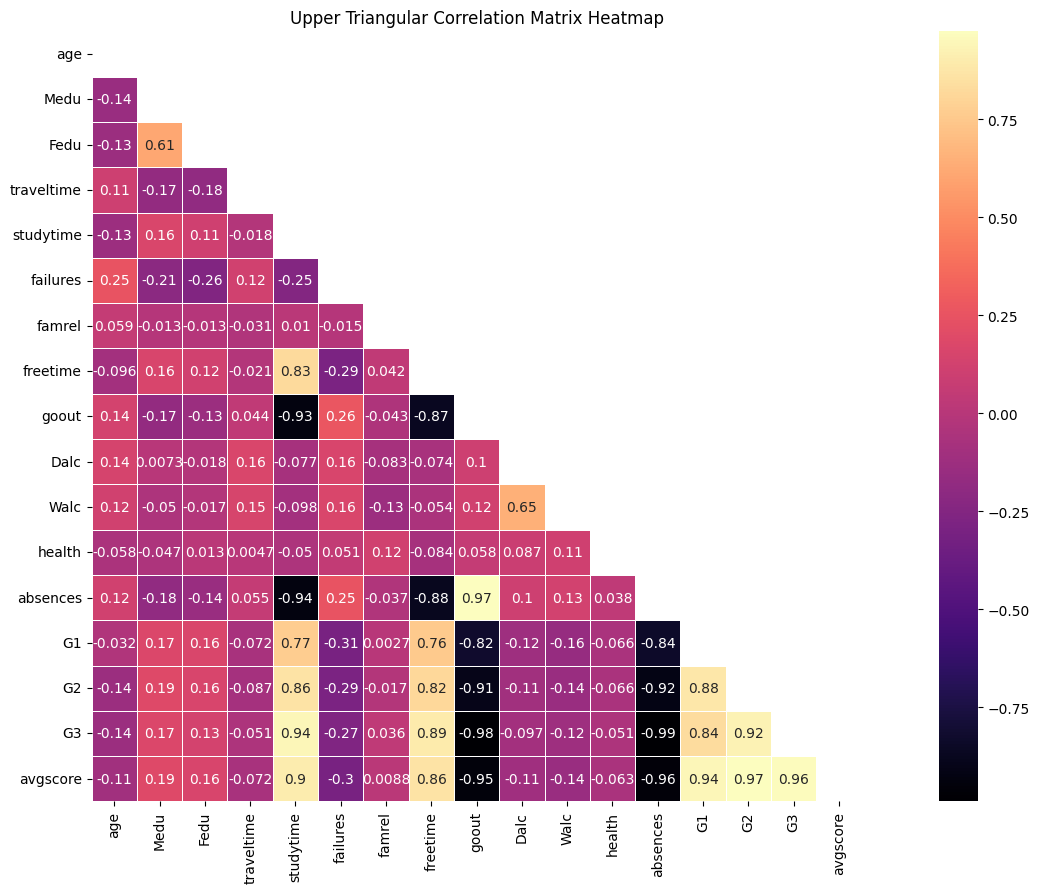

In [ ]:
corrMatrix = df.corr(method='pearson', numeric_only=True)

# Step 2: Generate a mask for the upper triangular matrix
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Step 3: Plot the heatmap with the mask applied (upper triangular only)
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatrix, mask=mask, annot=True, cmap='magma', square=True, linewidths=0.5)

# Display the plot
plt.title('Upper Triangular Correlation Matrix Heatmap')
plt.show()

In [ ]:
# prompt: can you write the make coorMatrix in table for for G3 with all others

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code) ...

# Assuming 'corrMatrix' is already calculated as in your provided code

# Extract the correlation values for 'G3' with other columns
g3_correlations = corrMatrix['G3'].drop('G3')  # Remove self-correlation

# Create a DataFrame for the table
g3_correlation_table = pd.DataFrame({'Feature': g3_correlations.index, 'Correlation with G3': g3_correlations.values})

# Display the table
print(g3_correlation_table)


#Alternative using sort_values for better readability
g3_correlation_table = g3_correlation_table.sort_values(by='Correlation with G3', ascending=False)
g3_correlation_table

       Feature  Correlation with G3
0          age            -0.135084
1         Medu             0.172941
2         Fedu             0.134078
3   traveltime            -0.051415
4    studytime             0.942636
5     failures            -0.267262
6       famrel             0.036239
7     freetime             0.892277
8        goout            -0.983662
9         Dalc            -0.097162
10        Walc            -0.117684
11      health            -0.050942
12    absences            -0.989639
13          G1             0.835993
14          G2             0.922163
15    avgscore             0.962307


,Feature,Correlation with G3
15,avgscore,0.962307
4,studytime,0.942636
14,G2,0.922163
7,freetime,0.892277
13,G1,0.835993
1,Medu,0.172941
2,Fedu,0.134078
6,famrel,0.036239
11,health,-0.050942
3,traveltime,-0.051415


In [ ]:
medug1 = corrMatrix['Medu']['G1']
fedug1 = corrMatrix['Fedu']['G1']
studtimeG1 = corrMatrix['studytime']['G1']
g2ong1 = corrMatrix['G2']['G1']
print("Correlations of important variables on G1 scores\n")
print("Mother education on G1 score = " + str(round(medug1,2)))
print("Father education on G1 score = " + str(round(fedug1,2)))
print("Study time on G1 score = " + str(round(studtimeG1,2)))
print("G2score on G1 score = " + str(round(g2ong1,2)))

Correlations of important variables on G1 scores

Mother education on G1 score = 0.17
Father education on G1 score = 0.16
Study time on G1 score = 0.77
G2score on G1 score = 0.88


In [ ]:
medug1 = corrMatrix['Medu']['G1']
fedug1 = corrMatrix['Fedu']['G1']
studtimeG1 = corrMatrix['studytime']['G1']
g2ong1 = corrMatrix['G2']['G1']
print("Correlations of important variables on G1 scores\n")
print("Mother education on G1 score = " + str(round(medug1,2)))
print("Father education on G1 score = " + str(round(fedug1,2)))
print("Study time on G1 score = " + str(round(studtimeG1,2)))
print("G2score on G1 score = " + str(round(g2ong1,2)))

Correlations of important variables on G1 scores

Mother education on G1 score = 0.17
Father education on G1 score = 0.16
Study time on G1 score = 0.77
G2score on G1 score = 0.88


In [ ]:
df.select_dtypes('object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [ ]:
#do one hot incoding for column schoolups
dummies_df = pd.get_dummies(df['activities'],dtype=int)
dummies_df.columns = ['activities_no','activities_yes']
df = pd.concat([df,dummies_df],axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_no,activities_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,26.018269,5,6,6,5.666667,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,24.199607,5,5,6,5.333333,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,17.873831,7,8,10,8.333333,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,7.158495,15,14,15,14.666667,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,18.204129,6,10,10,8.666667,1,0


In [ ]:
df.drop('activities_no', axis=1, inplace=True)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,22.291345,1,1,3,26.018269,5,6,6,5.666667,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,21.215663,1,1,3,24.199607,5,5,6,5.333333,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,15.438044,2,3,3,17.873831,7,8,10,8.333333,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,7.923995,1,1,5,7.158495,15,14,15,14.666667,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,15.639512,1,2,5,18.204129,6,10,10,8.666667,0


In [ ]:
(df['activities'] == 'yes').value_counts()

,count
activities,
True,188
False,180


In [ ]:
# Assuming you want to create a new DataFrame with 'activities_yes'
numeric_df = df[['activities_yes']].copy()  # Create a DataFrame with activities_yes
# Now you can add more numeric columns if needed
# numeric_df = pd.concat([numeric_df, other_numeric_columns], axis=1)

In [ ]:
df['romantic'].value_counts()

,count
romantic,
no,251
yes,117


In [ ]:
in_relationship_avg = df[df['romantic'] == 'yes']['avgscore'].mean()
not_in_relationship_avg = df[df['romantic'] == 'no']['avgscore'].mean()

print('Average score of students in relationship: ', in_relationship_avg)
print('Average score of students not in relationship: ', not_in_relationship_avg)

Average score of students in relationship:  10.982905982905987
Average score of students not in relationship:  11.270916334661354


In [ ]:
dummies_df = pd.get_dummies(df['romantic'],dtype=int)
dummies_df.columns = ['romantic_no','romantic_yes']
df = pd.concat([df,dummies_df],axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,avgscore,activities_yes,romantic_no,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,26.018269,5,6,6,5.666667,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,24.199607,5,5,6,5.333333,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,17.873831,7,8,10,8.333333,0,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,7.158495,15,14,15,14.666667,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,18.204129,6,10,10,8.666667,0,1,0


In [ ]:
df.drop('romantic_no', axis=1,inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_yes,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,26.018269,5,6,6,5.666667,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,24.199607,5,5,6,5.333333,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,17.873831,7,8,10,8.333333,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,7.158495,15,14,15,14.666667,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,18.204129,6,10,10,8.666667,0,0


<ipython-input-144-051ee6559b42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['romantic'] == 'yes']['avgscore'], color='blue')
<ipython-input-144-051ee6559b42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['romantic'] == 'no']['avgscore'], color='red')


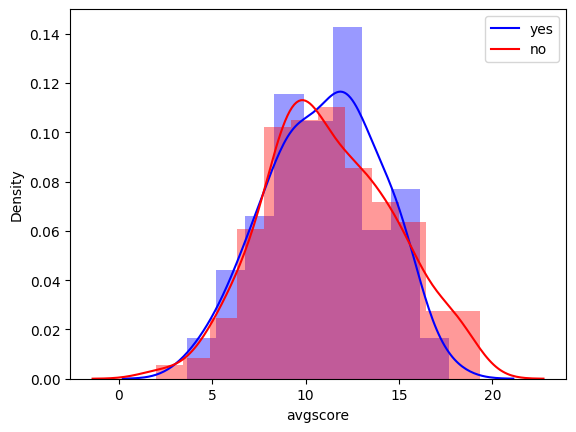

In [ ]:
sns.distplot(df[df['romantic'] == 'yes']['avgscore'], color='blue')
sns.distplot(df[df['romantic'] == 'no']['avgscore'], color='red')
plt.legend(['yes', 'no'])

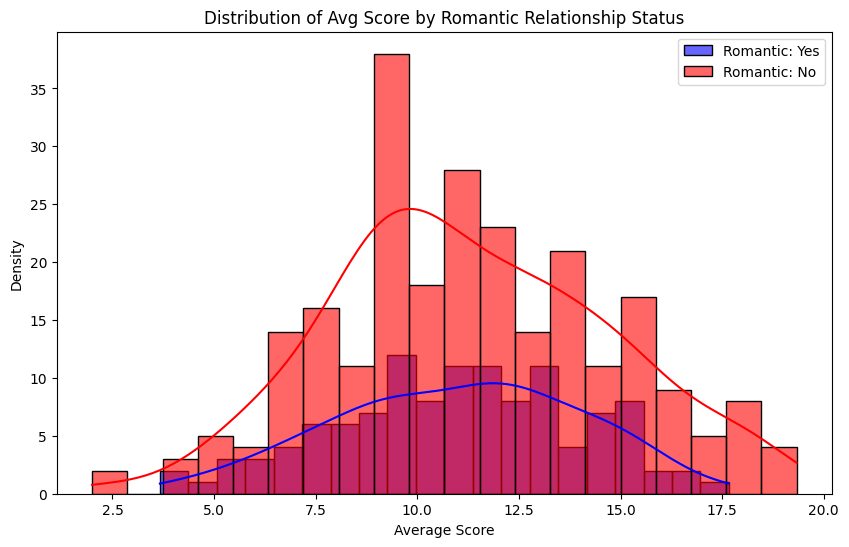

In [ ]:
# Plot the distribution of 'avgscore' for 'romantic' = yes and no
plt.figure(figsize=(10, 6))

# Use histplot for distributions with proper binning and transparency
sns.histplot(df[df['romantic'] == 'yes']['avgscore'], color='blue', kde=True, label='Romantic: Yes', alpha=0.6, bins=20)
sns.histplot(df[df['romantic'] == 'no']['avgscore'], color='red', kde=True, label='Romantic: No', alpha=0.6, bins=20)

# Add legend and labels
plt.legend()
plt.title('Distribution of Avg Score by Romantic Relationship Status')
plt.xlabel('Average Score')
plt.ylabel('Density')

# Display the plot
plt.show()

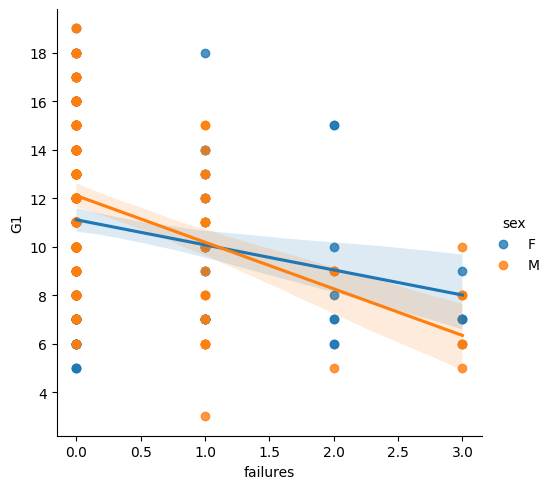

In [ ]:
sns.lmplot(x='failures', y = 'G1', data = df, hue = 'sex')

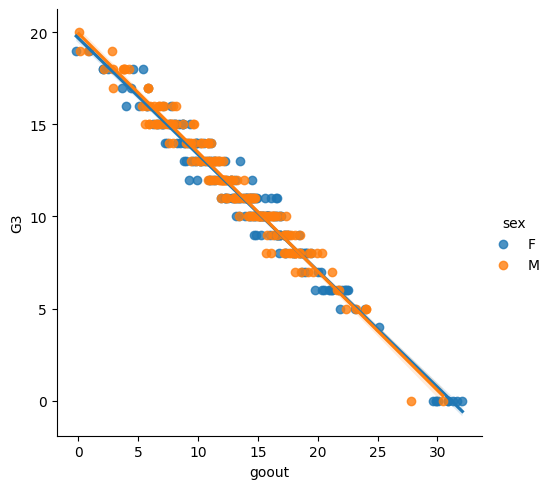

In [ ]:
sns.lmplot(x='goout', y = 'G3', data = df, hue = 'sex')

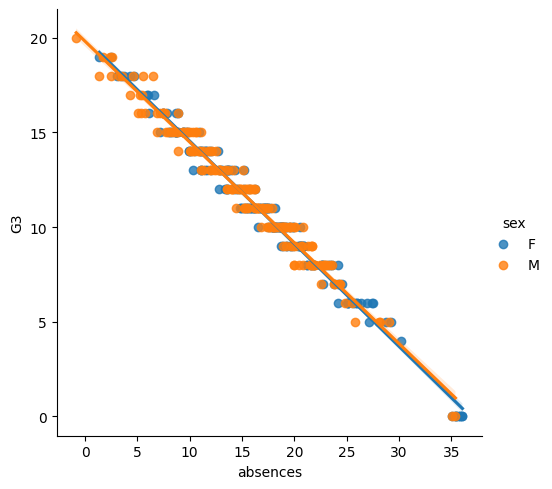

In [ ]:
sns.lmplot(x='absences', y = 'G3', data = df, hue = 'sex')

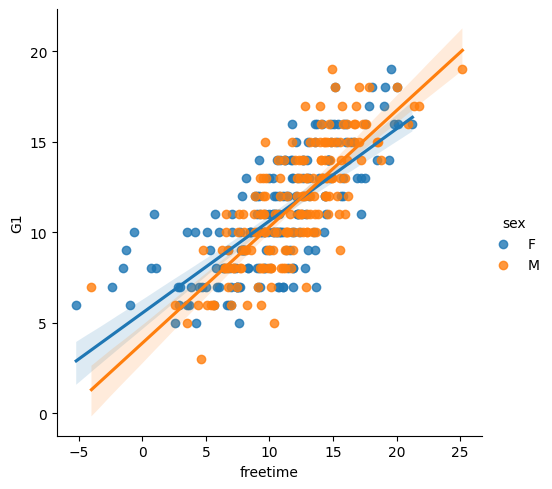

In [ ]:
sns.lmplot(x='freetime', y = 'G1', data = df, hue = 'sex')

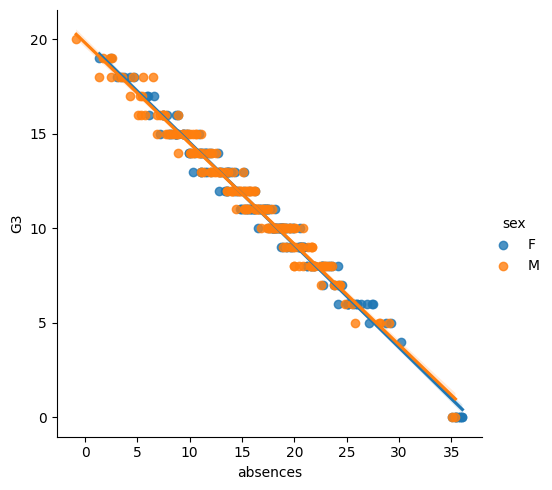

In [ ]:
sns.lmplot(x='absences', y = 'G3', data = df, hue = 'sex')

In [ ]:
# prompt: write code to make the correlation table of g3 with every one and sort it

# Assuming 'corrMatrix' is already calculated as in your provided code

# Extract the correlation values for 'G3' with other columns
g3_correlations = corrMatrix['G3'].drop('G3')  # Remove self-correlation

# Create a DataFrame for the table
g3_correlation_table = pd.DataFrame({'Feature': g3_correlations.index, 'Correlation with G3': g3_correlations.values})

# Sort the table by correlation with G3 in descending order
g3_correlation_table = g3_correlation_table.sort_values(by='Correlation with G3', ascending=False)

# Display the sorted table
g3_correlation_table

,Feature,Correlation with G3
15,avgscore,0.962307
4,studytime,0.942636
14,G2,0.922163
7,freetime,0.892277
13,G1,0.835993
1,Medu,0.172941
2,Fedu,0.134078
6,famrel,0.036239
11,health,-0.050942
3,traveltime,-0.051415


In [ ]:
# prompt: can can you using the predict the G3 score by using mulitple linear regerssion using 5 strong correalted

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with the preprocessed data

# Define features (X) and target (y)
features = ['G2', 'G1', 'studytime', 'failures', 'absences']  # Top 5 correlated features
X = df[features]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can now use the trained model to make predictions on new data
# For example:
# new_data = pd.DataFrame({'G2': [10], 'G1': [12], 'studytime': [2], 'failures': [0], 'absences': [5]})
# predicted_g3 = model.predict(new_data)
# print(f"Predicted G3 score: {predicted_g3[0]}")

Mean Squared Error: 0.3184572983961237
R-squared: 0.973961564122599


In [ ]:
# prompt: can can you using the predict the G3 score by using mulitple linear regerssion using 5 strong correalted

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with the preprocessed data

# Define features (X) and target (y)
features = ['G2', 'goout', 'studytime', 'failures', 'absences']  # Top 5 correlated features
X = df[features]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can now use the trained model to make predictions on new data
# For example:
# new_data = pd.DataFrame({'G2': [10], 'G1': [12], 'studytime': [2], 'failures': [0], 'absences': [5]})
# predicted_g3 = model.predict(new_data)
# print(f"Predicted G3 score: {predicted_g3[0]}")

Mean Squared Error: 0.19503863436529034
R-squared: 0.9840528039391347
